In [1]:
import numpy as np
import pylab as plt
%matplotlib inline
import json

In [2]:
from frbpa.search import riptide_search, p4j_search, pr3_search
from frbpa.utils import get_phase

In [3]:
with open('r2_data.json', 'r') as f:
    r2_data = json.load(f)

burst_dict = r2_data['bursts']
startmjds_dict = r2_data['obs_startmjds']
duration_dict = r2_data['obs_duration']

In [4]:
all_bursts = []
for k in burst_dict.keys():
    all_bursts += burst_dict[k]

In [5]:
bursts = np.array(burst_dict['CHIME'])
unique_days = np.unique(np.round(bursts))

startmjds = np.array(startmjds_dict['CHIME'])
durations = np.array(duration_dict['CHIME'])

In [6]:
np.max(bursts) - np.min(bursts)

565.4600371140041

## Pearson chi-square test (PR3)

In [7]:
rch, p = pr3_search(bursts=bursts, obs_mjds=startmjds, 
                    obs_durations=durations, pmin=np.pi*1, pmax=np.pi*100)

100%|██████████| 1758680/1758680 [14:16<00:00, 2052.85it/s]
2020-06-08 14:27:22,361 - pr3_search -root - INFO - Max reduced chi square value is 38.33775445436822 at period of 3.9977105429640285


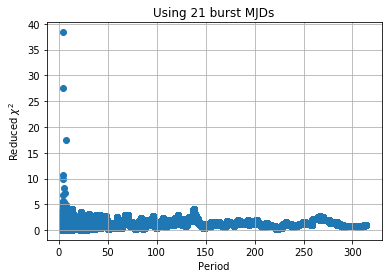

In [8]:
plt.scatter(p, rch)
plt.ylabel(r'Reduced $\chi^2$')
plt.title(f'Using {len(bursts)} burst MJDs')
plt.xlabel('Period')
plt.grid()

In [16]:
mask = (p > 10) & (p < 150)

#### As there is a huge peak at 3.99 day due to the harmonic of sidereal day, let's just plot for period between 5 and 50 days

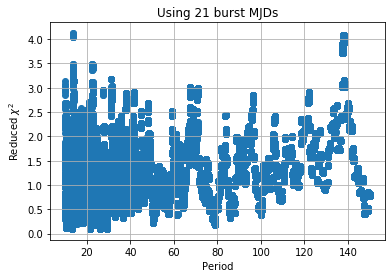

In [17]:
plt.scatter(p[mask], rch[mask])
plt.ylabel(r'Reduced $\chi^2$')
plt.title(f'Using {len(bursts)} burst MJDs')
plt.xlabel('Period')
plt.grid()

#### There is a lot of noise and a lot of peaks there. The one at a period of 15 day and 138 day appear strongest in this range. Let's take search at just unique days now

In [11]:
rch_uniq, p_u = pr3_search(bursts=unique_days, obs_mjds=startmjds, 
                    obs_durations=durations, pmin=np.pi*1, pmax=np.pi*100)

100%|██████████| 1757249/1757249 [14:33<00:00, 2012.26it/s]
2020-06-08 14:42:13,728 - pr3_search -root - INFO - Max reduced chi square value is 4.326397184476725 at period of 5.14920538753357


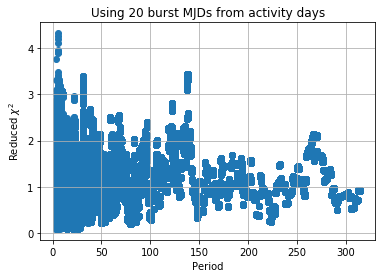

In [12]:
plt.scatter(p_u, rch_uniq)
plt.ylabel(r'Reduced $\chi^2$')
plt.title(f'Using {len(unique_days)} burst MJDs from activity days')
plt.xlabel('Period')
plt.grid()

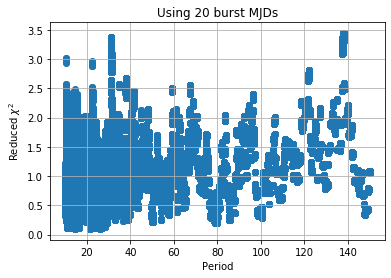

In [20]:
mask = (p_u > 10) & (p_u < 150)
plt.scatter(p_u[mask], rch_uniq[mask])
plt.ylabel(r'Reduced $\chi^2$')
plt.title(f'Using {len(unique_days)} burst MJDs')
plt.xlabel('Period')
plt.grid()

#### Now the 15 day peak got weaker, but there is a new one at 30 days. The one around 138 days is still pretty strong. Would need more bursts to test this period.  

# Searching for period with narrowest folded profile (Rajwade et al 2020)

In [21]:
all_bursts = np.array(all_bursts)
all_bursts = np.sort(all_bursts - np.min(all_bursts))

In [22]:
unique_days = np.unique(np.round(all_bursts))

In [23]:
cont_frac, p = riptide_search(all_bursts, pmin=2, pmax=1.5*365)

2020-06-08 14:54:10,649 - riptide_search -root - WARNING - Period/nbins should be greater than tsamp. Not all periods in the given range are valid. Selecting the valid periods from 2.0000239072593806 days for search.
100%|██████████| 83352/83352 [01:07<00:00, 1226.67it/s]
2020-06-08 14:55:18,608 - riptide_search -root - INFO - Max continuous fraction without data is 0.45 at a period of 2.503159719963408 days


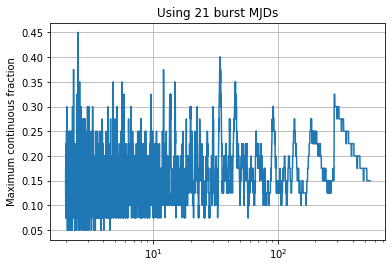

In [41]:
plt.plot(p, cont_frac)
plt.ylabel(r'Maximum continuous fraction')
plt.title(f'Using {len(all_bursts)} burst MJDs')
plt.xscale('log')
plt.grid()

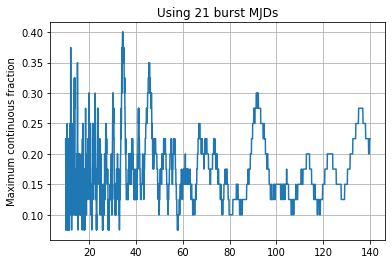

In [36]:
mask = (p > 10) & (p < 140)
plt.plot(p[mask], cont_frac[mask])
plt.ylabel(r'Maximum continuous fraction')
plt.title(f'Using {len(all_bursts)} burst MJDs')
plt.grid()

#### .... and a whole new set of peaks emerge, at 35, 45, 90, 138 days. The 138 (~140) day peak could be a harmonic of 35 day period, and the 90 day peak could be a harmonic of 45 day period. Again, more bursts would be needed for verification. 

### Using just unique days now

In [62]:
cont_frac_uniq, p2 = riptide_search(unique_days, pmin=2, pmax=1.5*365, nbins_profile=50)

2020-06-08 15:06:36,497 - riptide_search -root - WARNING - Period/nbins should be greater than tsamp. Not all periods in the given range are valid. Selecting the valid periods from 2.5000309955465765 days for search.
100%|██████████| 66675/66675 [00:55<00:00, 1204.27it/s]
2020-06-08 15:07:31,869 - riptide_search -root - INFO - Max continuous fraction without data is 0.42 at a period of 4.358922295903602 days


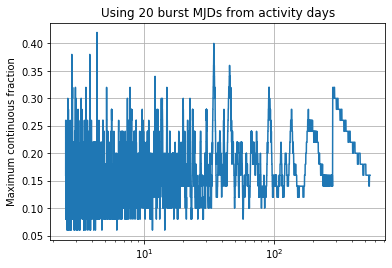

In [63]:
plt.plot(p2, cont_frac_uniq)
plt.ylabel(r'Maximum continuous fraction')
plt.title(f'Using {len(unique_days)} burst MJDs from activity days')
plt.xscale('log')
plt.grid()

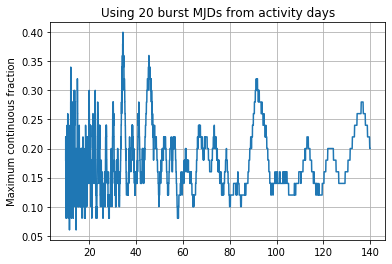

In [64]:
mask = (p2 > 10) & (p2 < 140)
plt.plot(p2[mask], cont_frac_uniq[mask])
plt.ylabel(r'Maximum continuous fraction')
plt.title(f'Using {len(unique_days)} burst MJDs from activity days')
plt.grid()

#### Again, we get the same peaks at 35, 45, 90 and 140 days. All of them look interesting! 

# Using P4J


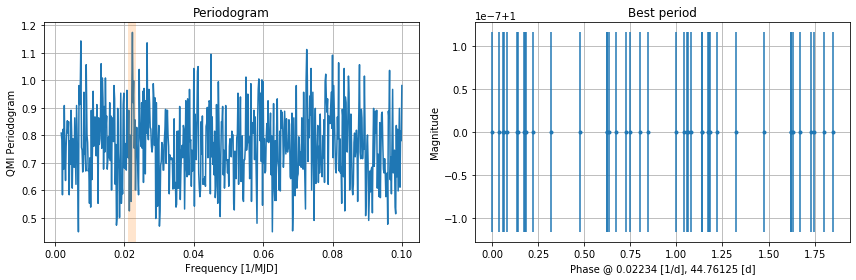

In [98]:
periodogram, _p = p4j_search(all_bursts,  pmin=10, pmax=365*1.5, plot=True, save=False, mjd_err=0.01)

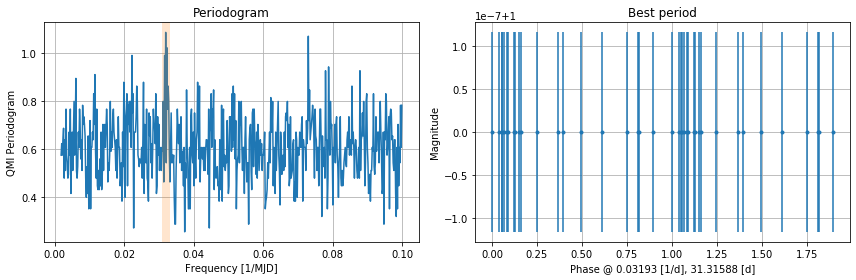

In [104]:
periodogram, _p = p4j_search(unique_days, pmin=10, pmax=365*1.5, plot=True, save=False, mjd_err=0.01)

#### P4J gives periods of 45 and 30 days (after some hand-holding). Both might be alias of 15 day period, which is deceptively close to the period of R3. Note, we are working with R2 bursts here. Again, more bursts are needed to increase the confidence in these periods.